# Housing Prices Predictor using One hot encoding

## 1.Data reading & splitting

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

In [2]:
url = "https://drive.google.com/file/d/1PfHTSBCyocef14hbf6fZi8x4GGXVaHM1/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

house = pd.read_csv(path)
house.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive',
       'MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation'],
      dtype='object')

In [3]:
house

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
0,8450,65.0,856,3,0,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc
1,9600,80.0,1262,3,1,0,2,298,0,0,RL,Feedr,GasA,Pave,Y,CBlock
2,11250,68.0,920,3,1,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc
3,9550,60.0,756,3,1,0,3,0,0,0,RL,Norm,GasA,Pave,Y,BrkTil
4,14260,84.0,1145,4,1,0,3,192,0,0,RL,Norm,GasA,Pave,Y,PConc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc
1456,13175,85.0,1542,3,2,0,2,349,0,0,RL,Norm,GasA,Pave,Y,CBlock
1457,9042,66.0,1152,4,2,0,1,0,0,1,RL,Norm,GasA,Pave,Y,Stone
1458,9717,68.0,1078,2,0,0,1,366,0,0,RL,Norm,GasA,Pave,Y,CBlock


### X and y creation

In [4]:
# Create X
X = house
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   Expensive     1460 non-null   int64  
 10  MSZoning      1460 non-null   object 
 11  Condition1    1460 non-null   object 
 12  Heating       1460 non-null   object 
 13  Street        1460 non-null   object 
 14  CentralAir    1460 non-null   object 
 15  Foundation    1460 non-null   object 
dtypes: float64(1), int64(9), object(6)
memory usage: 182.6+ KB


In [5]:
X = X.drop_duplicates()

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1449 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1449 non-null   int64  
 1   LotFrontage   1192 non-null   float64
 2   TotalBsmtSF   1449 non-null   int64  
 3   BedroomAbvGr  1449 non-null   int64  
 4   Fireplaces    1449 non-null   int64  
 5   PoolArea      1449 non-null   int64  
 6   GarageCars    1449 non-null   int64  
 7   WoodDeckSF    1449 non-null   int64  
 8   ScreenPorch   1449 non-null   int64  
 9   Expensive     1449 non-null   int64  
 10  MSZoning      1449 non-null   object 
 11  Condition1    1449 non-null   object 
 12  Heating       1449 non-null   object 
 13  Street        1449 non-null   object 
 14  CentralAir    1449 non-null   object 
 15  Foundation    1449 non-null   object 
dtypes: float64(1), int64(9), object(6)
memory usage: 192.4+ KB


In [6]:
#Create y
y = X.pop("Expensive")

In [7]:
print(y.tolist())

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 

In [8]:
X['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

### Basic Exploration

In [9]:
X.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
0,8450,65.0,856,3,0,0,2,0,0,RL,Norm,GasA,Pave,Y,PConc
1,9600,80.0,1262,3,1,0,2,298,0,RL,Feedr,GasA,Pave,Y,CBlock
2,11250,68.0,920,3,1,0,2,0,0,RL,Norm,GasA,Pave,Y,PConc
3,9550,60.0,756,3,1,0,3,0,0,RL,Norm,GasA,Pave,Y,BrkTil
4,14260,84.0,1145,4,1,0,3,192,0,RL,Norm,GasA,Pave,Y,PConc


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1449 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1449 non-null   int64  
 1   LotFrontage   1192 non-null   float64
 2   TotalBsmtSF   1449 non-null   int64  
 3   BedroomAbvGr  1449 non-null   int64  
 4   Fireplaces    1449 non-null   int64  
 5   PoolArea      1449 non-null   int64  
 6   GarageCars    1449 non-null   int64  
 7   WoodDeckSF    1449 non-null   int64  
 8   ScreenPorch   1449 non-null   int64  
 9   MSZoning      1449 non-null   object 
 10  Condition1    1449 non-null   object 
 11  Heating       1449 non-null   object 
 12  Street        1449 non-null   object 
 13  CentralAir    1449 non-null   object 
 14  Foundation    1449 non-null   object 
dtypes: float64(1), int64(8), object(6)
memory usage: 181.1+ KB


In [11]:
y.info()

<class 'pandas.core.series.Series'>
Index: 1449 entries, 0 to 1459
Series name: Expensive
Non-Null Count  Dtype
--------------  -----
1449 non-null   int64
dtypes: int64(1)
memory usage: 22.6 KB


In [12]:
X.isna().sum()

LotArea           0
LotFrontage     257
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
MSZoning          0
Condition1        0
Heating           0
Street            0
CentralAir        0
Foundation        0
dtype: int64

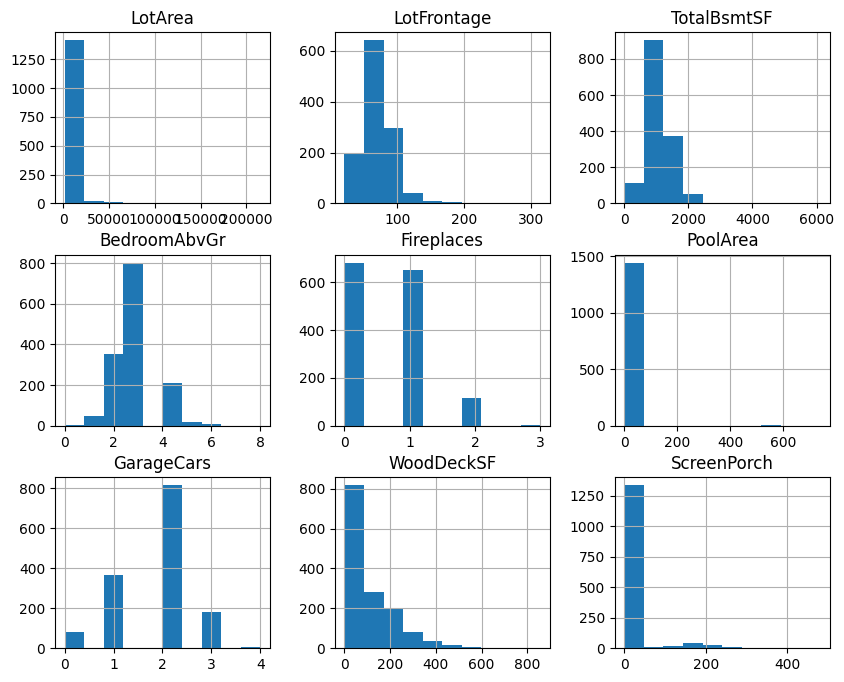

In [13]:
X.hist(figsize=(10, 8));

In [14]:
# Data Splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
1307,8072,60.0,990,3,0,0,2,0,0,RL,Norm,GasA,Pave,Y,PConc
1291,1680,21.0,630,3,0,0,1,185,0,RM,Norm,GasA,Pave,Y,CBlock
1039,1477,21.0,630,1,0,0,1,0,0,RM,Norm,GasA,Pave,Y,CBlock
417,22420,86.0,1370,4,1,0,3,0,0,RL,Feedr,GasW,Pave,N,BrkTil
1170,9880,76.0,1096,3,1,576,1,203,0,RL,Norm,GasA,Pave,Y,CBlock


In [16]:
y_train.head()

1307    0
1291    0
1039    0
417     0
1170    0
Name: Expensive, dtype: int64

## 2.Categorical encoding - "MANUAL" approach  (Without using Pipelines)

### 2.1. Replacing NaNs

We will need two different strategies to deal with missing values in numerical and categorical features.

#### 2.1.1. Replacing NaNs in categorical features

We were imputing the mean to NaN’s on our preprocessing pipeline for numerical features. There's a problem with categorical values: they don’t have a “mean”. Here, we will replace NaNs with a string that marks them: “N_A”. It is not an elegant solution, but it will allow us to move forward.

In [17]:
# selecting non-numerical columns
X_train_cat = X_train.select_dtypes(exclude="number")

# defining the imputer to use "N_A" as replacement value
cat_imputer = SimpleImputer(strategy="constant",
                            fill_value="N_A").set_output(transform='pandas')

# fitting and transforming
X_cat_imputed = cat_imputer.fit_transform(X_train_cat)

X_cat_imputed.head()

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
1307,RL,Norm,GasA,Pave,Y,PConc
1291,RM,Norm,GasA,Pave,Y,CBlock
1039,RM,Norm,GasA,Pave,Y,CBlock
417,RL,Feedr,GasW,Pave,N,BrkTil
1170,RL,Norm,GasA,Pave,Y,CBlock


#### 2.1.2. Replacing NaNs in numerical features

This is what we already did in previous notebooks: replacing numerical NaNs with the mean of their column.

In [18]:
# Selecting numerical columns
X_train_num = X_train.select_dtypes(include="number")

# Imputing the mean
num_imputer = SimpleImputer(strategy="mean").set_output(transform='pandas')

# Fitting and transforming
X_num_imputed = num_imputer.fit_transform(X_train_num)

X_num_imputed.sample(10)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
1324,9986.0,75.000000,1795.0,2.0,1.0,0.0,3.0,0.0,0.0
1361,16158.0,124.000000,1530.0,3.0,1.0,0.0,2.0,168.0,0.0
747,11700.0,65.000000,1240.0,4.0,1.0,0.0,4.0,181.0,0.0
1023,3182.0,43.000000,1346.0,2.0,1.0,0.0,2.0,156.0,0.0
308,12342.0,69.834737,861.0,1.0,0.0,0.0,2.0,158.0,0.0
708,9018.0,65.000000,728.0,3.0,1.0,0.0,2.0,100.0,0.0
684,16770.0,58.000000,1195.0,4.0,0.0,0.0,2.0,0.0,0.0
223,10500.0,70.000000,864.0,2.0,0.0,0.0,2.0,216.0,0.0
1075,13125.0,75.000000,800.0,3.0,2.0,0.0,1.0,0.0,0.0
252,8366.0,65.000000,798.0,3.0,0.0,0.0,2.0,138.0,0.0


In [19]:
# Concatenating all columns
X_imputed = pd.concat([X_cat_imputed, X_num_imputed], axis=1)

X_imputed.sample(10)

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
874,RM,Artery,GasA,Pave,Y,CBlock,5720.0,52.0,676.0,3.0,0.0,0.0,1.0,26.0,0.0
1261,RL,Norm,GasA,Pave,Y,CBlock,9600.0,80.0,1050.0,2.0,0.0,0.0,1.0,0.0,0.0
374,RL,Norm,GasA,Pave,Y,PConc,8200.0,65.0,847.0,4.0,1.0,0.0,2.0,100.0,0.0
1360,RL,Feedr,GasA,Pave,Y,BrkTil,9842.0,51.0,612.0,4.0,0.0,0.0,2.0,183.0,0.0
830,RL,Norm,GasA,Pave,Y,CBlock,11900.0,80.0,1392.0,3.0,2.0,0.0,2.0,0.0,192.0
553,RL,Feedr,GasA,Pave,Y,CBlock,8777.0,67.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0
524,RL,Norm,GasA,Pave,Y,PConc,11787.0,95.0,1379.0,3.0,1.0,0.0,3.0,239.0,0.0
686,FV,Norm,GasA,Pave,Y,PConc,10207.0,84.0,874.0,3.0,0.0,0.0,2.0,144.0,0.0
344,RM,Norm,GasA,Pave,Y,CBlock,2592.0,36.0,536.0,3.0,0.0,0.0,1.0,182.0,0.0
1225,RL,Norm,GasA,Pave,Y,CBlock,10482.0,65.0,588.0,3.0,0.0,0.0,1.0,224.0,0.0


### 2.2. One Hot encoding

As you have learnt in the Platform lesson, One Hot encoding means creating a new binary column for each category in every categorical column. Fortunately, a Scikit-Learn transformer takes care of everything.

In [20]:
# Fitting one hot encoding
from sklearn.preprocessing import OneHotEncoder

# initialize
my_onehot = OneHotEncoder(drop="first",sparse_output=False).set_output(transform='pandas')

# fit
my_onehot.fit(X_cat_imputed)

# transform
X_cat_imputed_onehot = my_onehot.transform(X_cat_imputed)

NOTE: If we leave `sparse_output=True`, the result will be a "sparse matrix": an object that Scikit-Learn creates when a matrix contains mostly zeros. In that case we would not be able to use `.set_output(transform='pandas')`.

In [21]:
X_cat_imputed_onehot.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,...,Heating_Grav,Heating_OthW,Heating_Wall,Street_Pave,CentralAir_Y,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
1307,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1291,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1039,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
417,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1170,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


#### 2.2.1. Concatenating "one-hot" columns with numerical columns:

Now that the categorical columns are numerical, we can join them back with the originally numerical columns and assemble the dataset that will be ready for modelling:

In [22]:
X_imputed = pd.concat([X_cat_imputed_onehot, X_num_imputed], axis=1)

X_imputed.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,...,Foundation_Wood,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
1307,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,8072.0,60.0,990.0,3.0,0.0,0.0,2.0,0.0,0.0
1291,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1680.0,21.0,630.0,3.0,0.0,0.0,1.0,185.0,0.0
1039,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1477.0,21.0,630.0,1.0,0.0,0.0,1.0,0.0,0.0
417,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,22420.0,86.0,1370.0,4.0,1.0,0.0,3.0,0.0,0.0
1170,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,9880.0,76.0,1096.0,3.0,1.0,576.0,1.0,203.0,0.0


##3.Categorical encoding - "Automated" approach (Using Pipelines)

In the manual approach, to encode the categorical columns numerically, we have:

1. Selected the categorical columns.
2. Fitted a `OneHotEncoder` to them.
3. Transformed the categorical columns with the encoder.
4. Converted the sparse matrix into a dataframe.
5. Recovered the names of the columns.
6. Concatenated the one-hot columns with the numerical columns.

### 3.1. Creating the "numeric pipe" and the "categoric pipe"

In [23]:
# select categorical and numerical column names
X_cat_columns = X.select_dtypes(exclude="number").columns
X_num_columns = X.select_dtypes(include="number").columns

# create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))

 # create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(sparse_output=False,handle_unknown='infrequent_if_exist',min_frequency=0.03)
)

### 3.2. Using `ColumnTransformer` a pipeline with 2 branches (the `preprocessor`)

We simply tell the pipeline the following:

- One branch, called `"num_pipe"`, will apply the steps in the `numeric_pipe` to the columns named in `X_num_columns`
- The second branch, called `"cat_pipe"`, will apply the steps in the `categoric_pipe` to the columns named in `X_cat_columns`

In [24]:
from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer(
    (numeric_pipe, X_num_columns),
    (categoric_pipe, X_cat_columns),
)

### 3.3. Creating the `full_pipeline` (`preprocessor` + Decision Tree)

Pipelines are modular. The `preprocessor` we created above with the `ColumnTransformer` can become now a step in a new pipeline, that we'll call `full_pipeline` and will include, as a last step, a Decision Tree model:

In [25]:
full_pipeline = make_pipeline(preprocessor,
                              DecisionTreeClassifier())

In [26]:
# Notice that we did not fit the `preprocessor` before — we only fit the pipeline once it has been fully assembled.
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N_A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                 min_frequency=0.03,
                                                                                 sparse_output=False))]),
                                                  Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation'],
      dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

This full pipeline can make predictions, as can any other pipeline that ends with a model:

In [27]:
full_pipeline.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
from sklearn.model_selection import GridSearchCV

# define parameter grid
param_grid = {
    "decisiontreeclassifier__max_depth": range(2, 10, 2),
    "decisiontreeclassifier__min_samples_leaf": range(4, 10, 2)
}

# define GridSearchCV
search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)

scores = {"htree" : search.best_score_}

scores

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'htree': 0.921480818032542}

### 3.4 Accessing steps of the pipeline

In [29]:
# first step in our pipeline is Simpleimputer

# we can access it with an index
full_pipeline[0]

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='N_A',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=0.03,
                                                                sparse_output=False))]),
                                 Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation'],
      dtype='object'))])

In [30]:
# or by it's name
full_pipeline['columntransformer']

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='N_A',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=0.03,
                                                                sparse_output=False))]),
                                 Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation'],
      dtype='object'))])

`named_steps` helps you navigate through the pipeline.   
When using it, you get the autocompletion active after every step.  
With `get_features_names_out()' you can get printed column names that specific estimator used

In [31]:
(full_pipeline
 .named_steps.columntransformer
 .named_transformers_['pipeline-1']
 .named_steps.simpleimputer
 .get_feature_names_out()
 )

array(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr',
       'Fireplaces', 'PoolArea', 'GarageCars', 'WoodDeckSF',
       'ScreenPorch'], dtype=object)

We can also get parameters out of any specific step, e.g. catogeries from onehotencoder step:

In [32]:
full_pipeline.named_steps.columntransformer.named_transformers_['pipeline-2'].named_steps.onehotencoder.categories_

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'], dtype=object),
 array(['Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['N', 'Y'], dtype=object),
 array(['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'], dtype=object)]

### 3.5 Including the imputer to the GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV

# define parameter grid
param_grid = {
    "columntransformer__pipeline-1__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 10, 2),
    "decisiontreeclassifier__min_samples_leaf": range(4, 10, 2)
}

# define GridSearchCV
search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      n_jobs=1,
                      verbose=1)

search.fit(X_train, y_train)

best_param = search.best_params_

best_param

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'columntransformer__pipeline-1__simpleimputer__strategy': 'mean',
 'decisiontreeclassifier__max_depth': 4,
 'decisiontreeclassifier__min_samples_leaf': 4}

In [34]:
accuracy_score(search.predict(X_test), y_test)

0.9172413793103448